# Image Classification Using Random Forests

## Imports

In [1]:
# First, let’s import the required packages as follows

import os
import numpy as np
from skimage import io, transform
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Assuming you have downloaded and extracted the dataset locally
data_dir = "../data/trash_images"

# Function to load and preprocess images
# We will resize the images to 64x64 pixels and flatten them to a 1-D numpy array
def load_images(folder):
    images = []
    labels = []
    for subdir, _, files in os.walk(folder):
        for file in files:
            img_path = os.path.join(subdir, file)
            label = os.path.basename(subdir)
            img = io.imread(img_path)
            img = transform.resize(img, (64, 64))  # Resize images to a consistent size
            images.append(img.flatten())  # Flatten the image
            labels.append(label)
    return np.array(images), np.array(labels)

## Data PreProcessing

In [66]:

# Function to train and evaluate a random forest classifier
# Load images and labels
images, labels = load_images(data_dir)

# Encode labels into numerical values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)


# Implementing a Random Forest Classifier

Let’s build a Random Forest Classifier to classify the images.

In [67]:
# Train and evaluate a random forest classifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=1001, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')  # Replace 'macro' with 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='macro')  # Replace 'macro' with 'binary' for binary classification
f1 = f1_score(y_test, y_pred, average='macro')  # Replace 'macro' with 'binary' for binary classification

# Print the metrics
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1:.4f}")

Accuracy: 72.33%
Precision: 73.05%
Recall: 67.61%
F1 Score: 0.6941


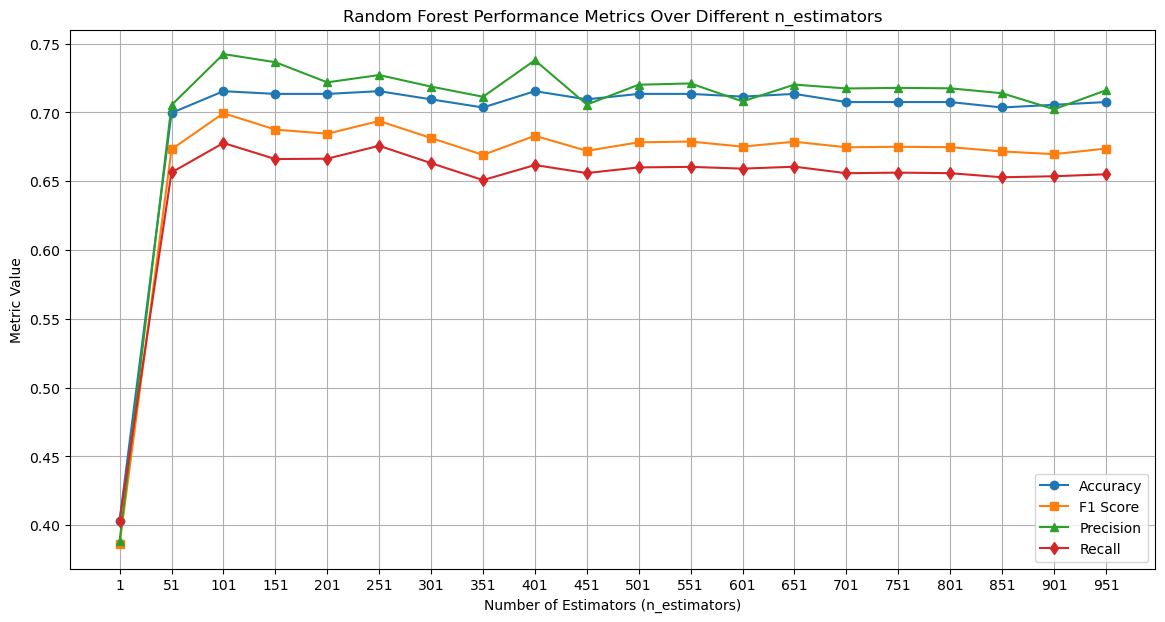

In [68]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Sample range for n_estimators. You can adjust the start, stop, and step values
n_estimators_values = range(1, 1001, 50)

# Lists to store the metrics for each value of n_estimators
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop over the specified range of n_estimators
for n in n_estimators_values:
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=80)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    
    # Store the evaluated metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

# Plot the metrics
plt.figure(figsize=(14, 7))
plt.plot(n_estimators_values, accuracies, label='Accuracy', marker='o')
plt.plot(n_estimators_values, f1_scores, label='F1 Score', marker='s')
plt.plot(n_estimators_values, precisions, label='Precision', marker='^')
plt.plot(n_estimators_values, recalls, label='Recall', marker='d')

plt.title('Random Forest Performance Metrics Over Different n_estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Metric Value')
plt.xticks(n_estimators_values)
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Test with an image
test_image_path = "../data/trash_images/cardboard/cardboard_015.jpg"
test_image = io.imread(test_image_path)
img = transform.resize(test_image, (64, 64))  # Resize images to a consistent size
img = img.flatten()
img = img.reshape(1, -1)
prediction = rf_classifier.predict(img)
label = label_encoder.inverse_transform(prediction)
print(f'The predicted class for the given image is: {label}')


The predicted class for the given image is: ['cardboard']


In [6]:
# test with another image
test_image_path = "../data/trash_images/metal/metal_003.jpg"
test_image = io.imread(test_image_path)
img = transform.resize(test_image, (64, 64))  # Resize images to a consistent size
img = img.flatten()
img = img.reshape(1, -1)
prediction = rf_classifier.predict(img)
label = label_encoder.inverse_transform(prediction)
print(f'The predicted class for the given image is: {label}')

The predicted class for the given image is: ['metal']


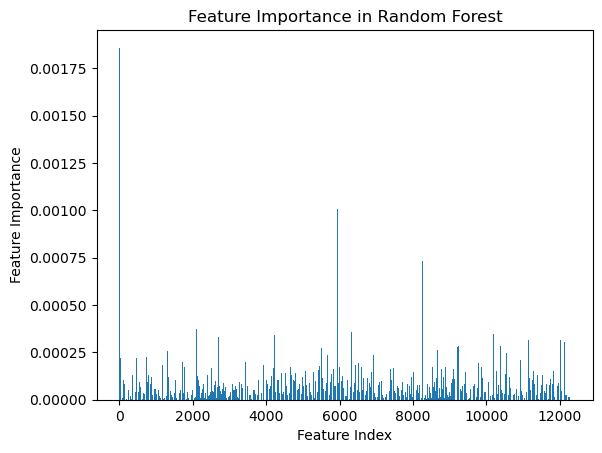

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
# Assuming 'clf' is your trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Visualize feature importances
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()
plt.savefig('random_forest_feature_importance.png')

In [8]:
from sklearn.inspection import PartialDependenceDisplay

features = [0, 1, 2, 3, 4, 5]  
X_train_features = labels
# Visualize partial dependence plots
PartialDependenceDisplay(rf_classifier, feature_names=X_train_features, features=features, target_idx=1, deciles=features)
plt.show()
